In [1]:
import matplotlib.pyplot as plot
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data=sns.load_dataset('tips')

In [4]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
plot.isinteractive()

True

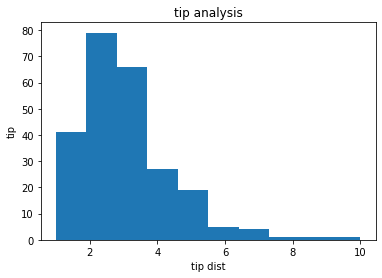

In [7]:
plot.xlabel('tip dist')
plot.ylabel('tip')
plot.title('tip analysis')
c=plot.hist(data['tip'],bins=10)

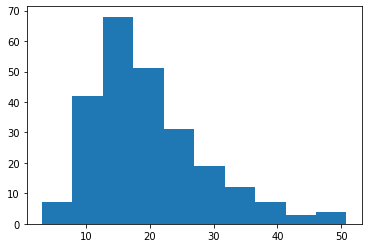

In [8]:
d=plot.hist(data['total_bill'],bins=10)

In [9]:
data['total_bill'].max()

50.81

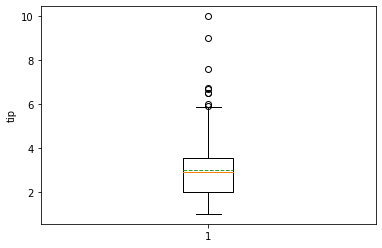

In [12]:
plot.ylabel('tip')
z=plot.boxplot(data['tip'],showmeans=True,meanline=True,showfliers=True)

In [15]:
day_tot=data.groupby('day',as_index=False)['total_bill'].sum()

In [16]:
day_tot

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


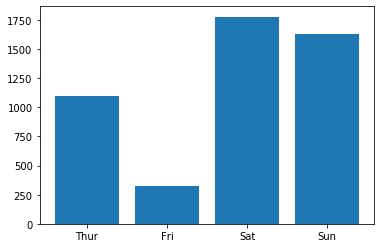

In [18]:
bar=plot.bar(x='day',height='total_bill',data=day_tot)

In [21]:
G_bill=data.groupby(['sex','day'],as_index=False)['total_bill'].sum()

In [22]:
G_bill

,sex,day,total_bill
0,Male,Thur,561.44
1,Male,Fri,198.57
2,Male,Sat,1227.35
3,Male,Sun,1269.46
4,Female,Thur,534.89
5,Female,Fri,127.31
6,Female,Sat,551.05
7,Female,Sun,357.70


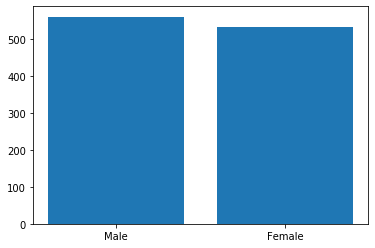

In [34]:
bar1=plot.bar(x='sex',height=G_bill['total_bill'].where(G_bill['day']=='Thur'),data=G_bill)

In [35]:
G_bill[G_bill['day']=='Thur']['total_bill']

0    561.44
4    534.89
Name: total_bill, dtype: float64

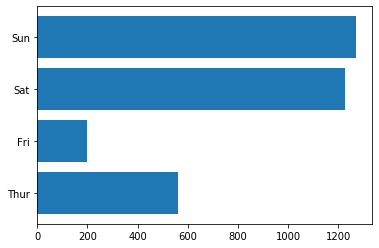

In [36]:
bar2=plot.barh(y='day',width='total_bill',data=G_bill)

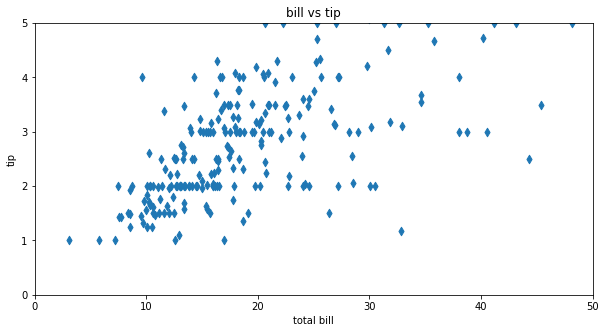

In [39]:
plot.xlabel('total bill')
plot.ylabel('tip')
plot.title('bill vs tip')
plot.scatter('total_bill','tip',marker='d',data=data)
plot.gcf().set_size_inches(10,5)
plot.xlim(0,50)
plot.ylim(0,5)
plot.savefig('scat.jpg')

### object API

In [41]:
totbill=data.groupby('day')['total_bill'].sum()

In [42]:
totTip=data.groupby('day')['tip'].sum()

In [43]:
totTip.index

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, name='day', dtype='category')

In [44]:
totTip.values

array([171.83,  51.96, 260.4 , 247.39])

<BarContainer object of 4 artists>

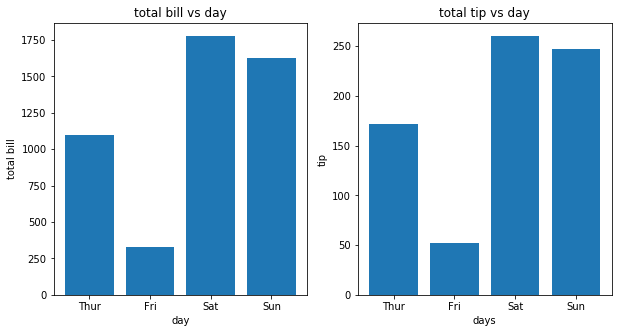

In [48]:
fig,ax=plot.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].set_title('total bill vs day')
ax[0].set_xlabel('day')
ax[0].set_ylabel('total bill')
ax[0].bar(x=totbill.index,height=totbill.values)

ax[1].set_title('total tip vs day')
ax[1].set_xlabel('days')
ax[1].set_ylabel('tip')
ax[1].bar(x=totTip.index,height=totTip.values)

In [47]:
type(totTip)

pandas.core.series.Series